#Séance 4: Sur-échantillonage et sous-échantillonage

Jessica Fornetti (AMSD)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score
from sklearn.metrics import RocCurveDisplay


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from imblearn.combine import SMOTETomek
from sklearn.decomposition import PCA


## Dataset Credit Fraud

In [8]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [9]:
x = df.drop(['Class'], axis=1)
y =df.Class

###Oversampling puis Undersampling avec hyperparamètres par default

On utilise la technique SMOTE et Tomek links, pour effectuer un oversampling suivi d'un undersampling. SMOTE est une technique de oversampling, qui permet de rajouter des individus de la classe minoritaire en créant de nouveaux individus à partir des features des individus les plus proches. Tomek links est une technique de undersampling qui permet d'enlever des individus de la classe majoritaire qui se situe très proche d'individus de la classe minoritaire.

En utilisant les 2 methodes conjointement, cela permet de trouver des modèles généralement plus performants.

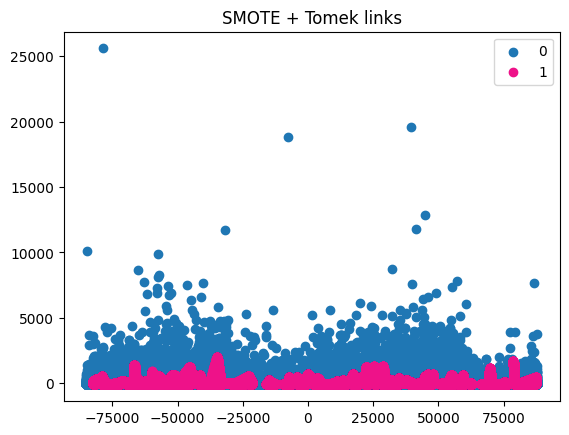

In [10]:
smt = SMOTETomek(sampling_strategy='auto')
x_smt, y_smt = smt.fit_resample(x, y)

def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#EE1289']
    markers = ['o', 'o']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()



pca = PCA(n_components=2)
x_smt2 = pca.fit_transform(x_smt)

plot_2d_space(x_smt2, y_smt, 'SMOTE + Tomek links')

On sépare notre dataset en train et test sets

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x_smt,y_smt,test_size=.2, random_state = 1989)

On scale les data, pour que aucun attribut n'ait plus d'importance que les autres 

In [12]:
Scaler_X = StandardScaler()
x_train = Scaler_X.fit_transform(x_train)
x_test = Scaler_X.transform(x_test)

###Régression Logisitque

On fait un modèle de Régression Logisitque avec les hyperparamètres par défaut

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

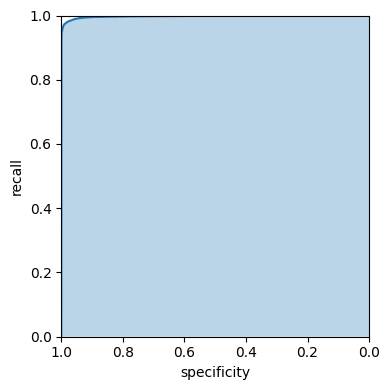

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y_test, lr.predict_proba(x_test)[:, 1]))

0.9975716497900398


On obtient un très bon modèle avec un AUC de 0.99, ce qui est meilleur que le modèle sans oversampling et undersampling (AUC de 0.97)

###Decision Tree

On fait un modèle Decision Tree avec les hyperparamètres par defaut

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

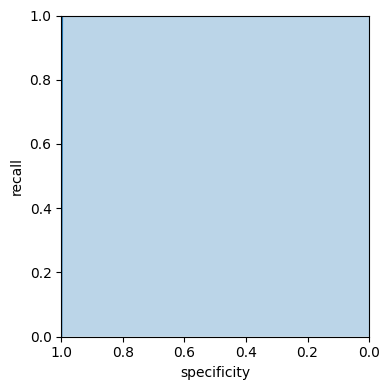

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(x_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y_test, dtree.predict_proba(x_test)[:, 1]))

0.9983200397032845


On obtient un très bon modèle avec un AUC très proche de 1, ce qui est meilleur que le modèle sans oversampling et undersampling (AUC de 0.84)

###SVM (sans kernel)

On fait un SVM (sans kernel) avec les hyperparamètres par defaut. On utilise LinearSVC car un SVM prend très longtemps avec un grand jeux de données. Mais LinearSVC ne donne pas les probabilitées associées au modèle donc on ne peut pas utiliser predict_proba et avoir la courbe ROC et l'AUC.


In [ ]:
svmLinear = LinearSVC()
svmLinear.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [ ]:
svmLinear.score(x_test, y_test)

0.976302064979914

On obtient un modèle avec une accuracy moyenne de 0.97 sur notre test set

###SVM (avec kernel)

On fait un SVM (avec kernel rbf) avec les hyperparamètres par défaut


In [ ]:
svm = SVC(probability = True)
svm.fit(x_train, y_train)

SVC(probability=True)

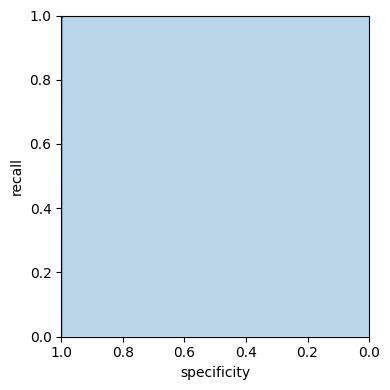

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, svm.predict_proba(x_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y_test, svm.predict_proba(x_test)[:, 1]))

0.9998085961077294


On obtient un très bon modèle avec un AUC de 0.99, ce qui est meilleur que le modèle sans oversampling et undersampling (qui avait un AUC de 0.93)

###Random Forest

On fait un model Random Forest avec les hyperparamètres par défaut

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

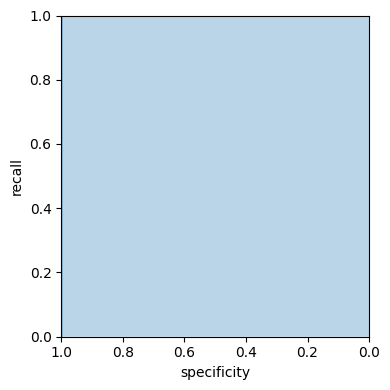

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y_test, rf.predict_proba(x_test)[:, 1]))

0.9999805405470085


On obtient un très bon modèle avec un AUC très proche de 1, ce qui est meilleur que le modèle sans oversampling et undersampling (qui avait un AUC de 0.94)

RECAP : 
On voit que pour tous les modèles, l'oversampling et undersampling ameliore l'AUC.

Pour l'instant après le oversampling et undersampling (et avec les hyperparamètres par défault), le meilleur modèle est un Random Forest(AUC tres proche de 1). Sans oversampling/undersampling on avait obtenu que le  meilleur modèle était une Régression Logistique.

###Oversampling puis Undersampling avec Grid Search

###Regression Logistique

On fait un grid search afin de trouver les meilleurs hyperparamètres. Comme precédement on s'interesse au type de solver, penalty et la valeur du parametre C. On raccourcit les valeurs que les hyperparamètres peuvent prendre car le grid search prend du temps sur ce dataset.


In [21]:
model = LogisticRegression()
cv = StratifiedKFold(n_splits=3)
space = dict()
space['solver'] = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky']
space['penalty'] = ['l1', 'l2']
space['C'] = [1e-3, 1e-1, 1, 10, 100]

search = GridSearchCV(model, space, scoring='roc_auc', n_jobs=-1, cv=cv) #On veut que le grid search prenne comme critere l'AUC
result = search.fit(x_smt, y_smt)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver l

Best Score: 0.9948562969205885
Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


On trouve que les meilleurs hyperparamètres sont C = 1, penalty = l1 et solver = liblinear, avec un score AUC trs proche de 1

On refait donc un modèle de régression logistique avec ces hyperparamètres

In [22]:
lrGS = LogisticRegression(penalty='l1', C=1, solver='liblinear')
lrGS.fit(x_train, y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

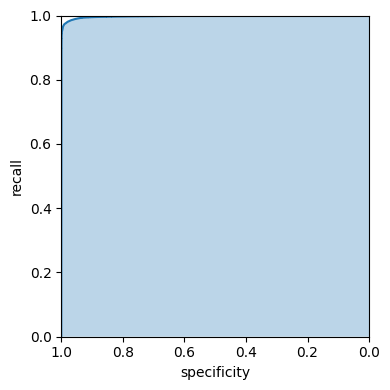

In [24]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, lrGS.predict_proba(x_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)

plt.tight_layout()
plt.show()

In [25]:
print(roc_auc_score(y_test, lrGS.predict_proba(x_test)[:, 1]))

0.9974695059787888


En comparaison au modèle du grid search precédent (sans oversampling et undersampling), on avait trouvé des hyperparamètres très differents : C = 0.001, penalty = l2, solver = newton-cg mais le modèle était tout aussi bon ayant un AUC de 0.98

Par rapport au modèle avec hyperparamètres par défault (C=1, penalty='l2', solver='lbfgs') après avoir fait du oversampling et undersampling, on obtient un modèle avec un AUC simlaire.

Donc le meilleur modèle avec oversampling et undersampling est celui trouve par le grid search : LogisticRegression(penalty='l1', C=1, solver='liblinear') ayant un AUC très proche de 1


###Decision Tree

On fait un grid search afin de trouver les meilleurs hyperparamètres. Comme precédement on regarde les hyperparamètres jugés les plus importants : criterion, max_leaf_nodes et min_samples_split et on laisse les autres par défault.


In [13]:
model = DecisionTreeClassifier()
cv = StratifiedKFold(n_splits=5)
space = dict()
space['criterion'] = ['gini', 'entropy', 'log_loss']
space['max_leaf_nodes'] = [None]
space['min_samples_split'] = [2, 3, 4]

search = GridSearchCV(model, space, scoring='roc_auc', n_jobs=-1, cv=cv) #On veut que le grid search prenne comme critere l'AUC
result = search.fit(x_smt, y_smt)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8162749429967555
Best Hyperparameters: {'criterion': 'entropy', 'max_leaf_nodes': None, 'min_samples_split': 4}


On trouve que les meilleurs hyperparamètres sont criterion = entropy, max_leaf_nodes = None, min_samples_split =  4, avec un score AUC de 0.81

On refait donc un modèle decision tree avec ces hyperparamètres

In [14]:
dtreeGS = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes = None, min_samples_split = 4)
dtreeGS.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=4)

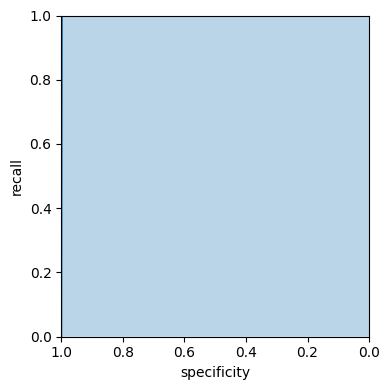

In [15]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, dtreeGS.predict_proba(x_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [16]:
print(roc_auc_score(y_test, dtreeGS.predict_proba(x_test)[:, 1]))

0.9986881411262093


On voit que sur notre test set on obtient un AUC très proche de 1 alors que le grid search nous donne un resultat très different. Notre modèle est très performant sur notre test set mais il n'est pas si bon en realité. Il faut donc plutot se baser sur l'AUC donné par le grid search qui est effectué sur plusieurs test sets issu du dataset entier



En comparaison au modèle du grid search precédent (sans oversampling et undersampling), on avait trouvé un hyperparamètre different : criterion = gini et le modèle avait un score AUC de 0.77, ce qui est legèrement moins bon que notre modèle.

Par rapport au modèle avec hyperparamètres par default (criterion='gini', min_samples_split=2, max_leaf_nodes=None) apres avoir fait du oversampling et undersampling, on obtient un modèle avec un AUC moins élevé. Cela est du fait que le modèle avec hyperparamètres par défaut est très bon sur notre test set en particulier mais n'est pas si bon en realité.

Le meilleur modèle avec oversampling et undersampling (et celui le plus fiable) est donc celui trouvé par le grid search : DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes = None, min_samples_split = 4) ayant un AUC de 0.81


###Random Forest

On fait un grid search afin de trouver les meilleurs hyperparamètres. Comme precédement on regarde les hyperparamètres jugés les plus importants : n_estimators, criterion, max_leaf_nodes et min_samples_split et on laisse les autres par défaut. 


In [17]:
model = RandomForestClassifier()
cv = StratifiedKFold(n_splits=3)
space = dict()
space['n_estimators'] = [20, 50, 100]
space['criterion'] = ['gini', 'entropy', 'log_loss']
space['max_leaf_nodes'] = [None]
space['min_samples_split'] = [2, 3, 4]


search = GridSearchCV(model, space, scoring='roc_auc', n_jobs=-1, cv=cv) #On veut que le grid search prenne comme critere l'AUC
result = search.fit(x_smt, y_smt)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9998929848074568
Best Hyperparameters: {'criterion': 'log_loss', 'max_leaf_nodes': None, 'min_samples_split': 2, 'n_estimators': 100}


On trouve que les meilleurs hyperparamètres sont criterion = log_loss, max_leaf_nodes = None, min_samples_split = 2, n_estimators = 100, avec un score AUC très proche de 1

On refait donc un modèle avec ces hyperparamètres

In [18]:
rfGS = RandomForestClassifier(criterion = 'log_loss', max_leaf_nodes = None, min_samples_split = 2, n_estimators = 100) 
rfGS.fit(x_train, y_train)

RandomForestClassifier(criterion='log_loss')

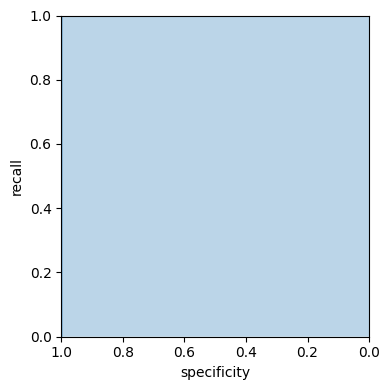

In [19]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, rfGS.predict_proba(x_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [20]:
print(roc_auc_score(y_test, rfGS.predict_proba(x_test)[:, 1]))

0.9999801506186731


En comparaison au modèle du grid search precédent (sans oversampling et undersampling), on avait trouvé presque exatement les memes hyperparamètres, seul ne nombre d'estimateurs change (n_estimators = 50) et le modèle avait un AUC de 0.93, ce qui est un peu moins bon que notre modèle. On voit que l'oversampling et undersampling a bien amelioré le modèle

Par rapport au modèle avec hyperparamètres par defaut (criterion='gini', min_samples_split=2, max_leaf_nodes=None, n_estimators=100) après avoir fait du oversampling et undersampling, on obtient un modèle avec un AUC très similaire.

Le meilleur modèle avec oversampling et undersampling est donc celui trouvé par le grid search : RandomForestClassifier(criterion = 'log_loss', max_leaf_nodes = None, min_samples_split = 2, n_estimators = 100) ayant un AUC très proche de 1


**Conclusion**:

Avec du oversampling et undersampling, le meilleur modèle trouvé par le grid search est le RandomForestClassifier(criterion = 'log_loss', max_leaf_nodes = None, min_samples_split = 2, n_estimators = 100) ayant un AUC très proche de 1.

Avant de faire le grid search, on avait aussi trouvé que le meilleur modèle (sur notre test set) etait un RandomForestClassifier (avec un AUC très proche de 1)

Sans oversampling et undersampling, le grid search precédent nous avait donné comme meilleur modèle la RégressionLogistique avec un AUC de 0.98 (même si le  modèle RandomForest était aussi très bon)

Pour conclure, on voit que le resampling permet d'améliorer nos modèles. On trouve comme meilleur modèle un RandomForestClassifier(criterion = 'log_loss', max_leaf_nodes = None, min_samples_split = 2, n_estimators = 100), alors que sans resampling on avait un different type de modèle une Régression Logistique.

## Dataset Bank Marketing

In [ ]:
df2 = pd.read_csv('bank-additional-full.csv', sep = ';')
df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
df2['y'] = df2['y'].replace(['no', 'yes'], [0, 1])
df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


Comme ce dataset contient des variables catégorielles, il faut les transformer en variable numérique en encodant chaque catégorie sous forme de int. 
On utilise le LabelEncoder de la bibliotheque sklearn pour le faire de facon automatisé

In [ ]:
labelEncoder = LabelEncoder()

df2['job'] = labelEncoder.fit_transform(df2['job']) 
df2['marital'] = labelEncoder.fit_transform(df2['marital']) 
df2['education'] = labelEncoder.fit_transform(df2['education']) 
df2['default'] = labelEncoder.fit_transform(df2['default']) 
df2['housing'] = labelEncoder.fit_transform(df2['housing']) 
df2['loan'] = labelEncoder.fit_transform(df2['loan']) 
df2['contact'] = labelEncoder.fit_transform(df2['contact']) 
df2['month'] = labelEncoder.fit_transform(df2['month']) 
df2['day_of_week'] = labelEncoder.fit_transform(df2['day_of_week'])
df2['poutcome'] = labelEncoder.fit_transform(df2['poutcome'])

df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [ ]:
x2 = df2.drop(['y'], axis=1)
y2 =df2.y

###Oversampling puis Undersampling avec hyperparamètres par défaut

On utilise la technique SMOTE et Tomek links, pour effectuer un oversampling suivi d'un undersampling

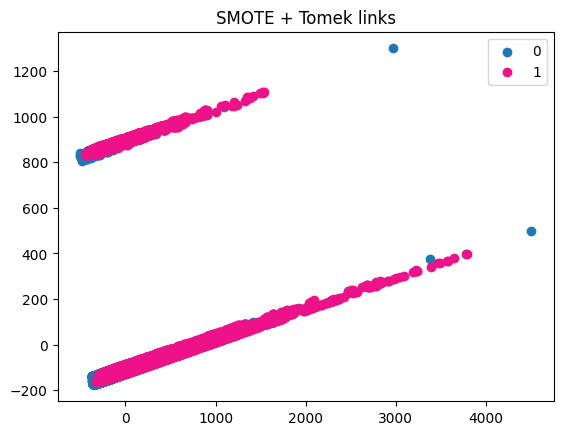

In [ ]:
smt = SMOTETomek(sampling_strategy='auto')
x2_smt, y2_smt = smt.fit_resample(x2, y2)

def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#EE1289']
    markers = ['o', 'o']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()



pca = PCA(n_components=2)
x2_smt2 = pca.fit_transform(x2_smt)

plot_2d_space(x2_smt2, y2_smt, 'SMOTE + Tomek links')

On partitionne notre dataset en train et test sets

In [ ]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x2_smt,y2_smt,test_size=.2, random_state = 1989)

In [ ]:
Scaler_X2 = StandardScaler()
x2_train = Scaler_X2.fit_transform(x2_train)
x2_test = Scaler_X2.transform(x2_test)

###Regression Logisitque

On fait un modèle de Regression Logisitque avec les hyperparamètres par défaut

In [ ]:
lr2 = LogisticRegression()
lr2.fit(x2_train, y2_train)

LogisticRegression()

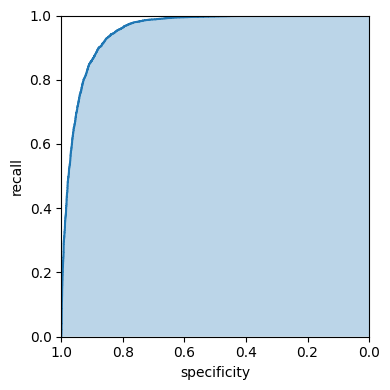

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y2_test, lr2.predict_proba(x2_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y2_test, lr2.predict_proba(x2_test)[:, 1]))

0.9524079929148008


On obtient un très bon modèle avec un AUC de 0.95, ce qui est meilleur que le modèle sans oversampling et undersampling (qui avait un AUC de 0.94).

###Decision Tree

On fait un modèle Decision Tree avec les hyperparamètres par defaut

In [ ]:
dtree2 = DecisionTreeClassifier()
dtree2.fit(x2_train, y2_train)

DecisionTreeClassifier()

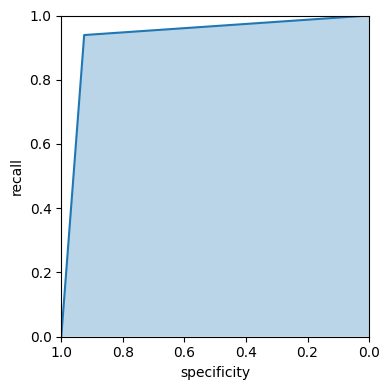

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y2_test, dtree2.predict_proba(x2_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y2_test, dtree2.predict_proba(x2_test)[:, 1]))

0.9323715902100925


On obtient un très bon modèle avec un AUC de 0.93 ce qui est meilleur que le modèle sans oversampling et undersampling (qui avait un AUC de 0.72).

###SVM (sans kernel)

On fait un SVM (sans kernel) avec les hyperparamètres par defaut

In [ ]:
svmLinear2 = SVC(kernel = 'linear', probability = True)
svmLinear2.fit(x2_train, y2_train)

SVC(kernel='linear', probability=True)

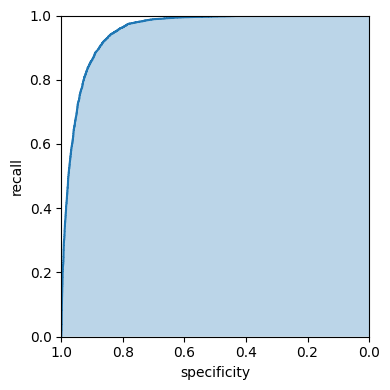

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y2_test, svmLinear2.predict_proba(x2_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y2_test, svmLinear2.predict_proba(x2_test)[:, 1]))

0.9523617834510423


On obtient un très bon modèle avec un AUC de 0.95, ce qui est meilleur que le modèle sans oversampling et undersampling (avec un AUC de 0.93)



###SVM (avec kernel)

On fait un SVM (avec kernel rbf) avec les hyperparamètres par défaut

In [ ]:
svm2 = SVC(probability = True)
svm2.fit(x2_train, y2_train)

SVC(probability=True)

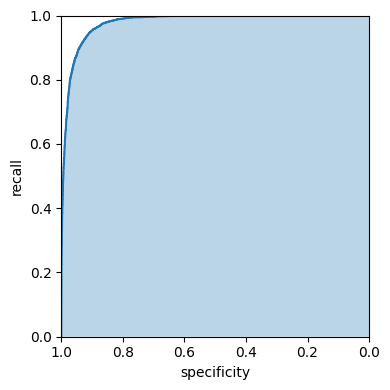

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y2_test, svm2.predict_proba(x2_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y2_test, svm2.predict_proba(x2_test)[:, 1]))

0.9782902611760403


On obtient un très bon modèle avec un AUC de 0.97 ce qui est meilleur que le modèle sans oversampling et undersampling (qui avait un AUC de 0.89)

###Random Forest

On fait un modèle Random Forest avec les hyperparamètres par defaut

In [ ]:
rf2 = RandomForestClassifier()
rf2.fit(x2_train, y2_train)

RandomForestClassifier()

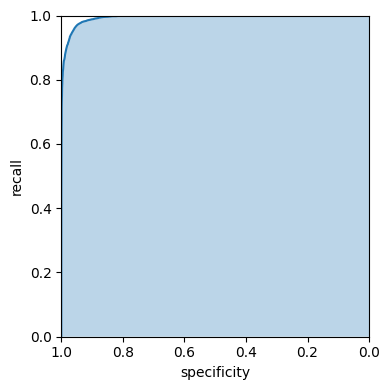

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y2_test, rf2.predict_proba(x2_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y2_test, rf2.predict_proba(x2_test)[:, 1]))

0.9933998490163394


On obtient un très bon modèle avec un AUC de 0.99, ce qui est meilleur que le modèle sans oversampling et undersampling (qui avait un AUC de 0.94).

RECAP : On voit que pour tous les modèles, l'oversampling et undersampling améliore l'AUC.

Pour l'instant après le oversampling et undersampling (et les hyperparamètres par défaut), le meilleur modele est un Random Forest(AUC de 0.99). Sans oversampling/undersampling on obtient aussi que le meilleur modèle est un Random Forest Classifier.

###Oversampling puis Undersampling avec Grid Search

###Regression Logistique

On fait un grid search afin de trouver les meilleurs hyperparamètres. Comme precédement on s'interesse au type de solver, penalty et la valeur du paramètre C.


In [ ]:
model = LogisticRegression()
cv = StratifiedKFold(n_splits=5)
space = dict()
space['solver'] = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

search = GridSearchCV(model, space, scoring='roc_auc', n_jobs=-1, cv=cv) #On veut que le grid search prenne comme critere l'AUC
result = search.fit(x2_smt, y2_smt)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
440 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 71, in _check_solver
    raise ValueError("penalty='none' is n

Best Score: 0.9246394193032244
Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


On trouve que les meilleurs hyperparamètres sont C = 10, penalty = l2 et solver = liblinear, avec un score AUC de 0.92.

On refait donc un modèle de régression logistique avec ces hyperparamètres

In [ ]:
lr2GS = LogisticRegression(penalty='l2', C=10, solver='liblinear')
lr2GS.fit(x2_train, y2_train)

LogisticRegression(C=10, solver='liblinear')

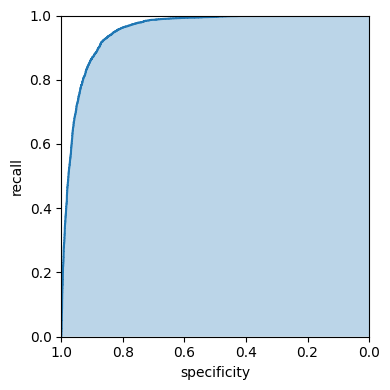

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y2_test, lr2GS.predict_proba(x2_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y2_test, lr2GS.predict_proba(x2_test)[:, 1]))

0.9524136669172941


En comparaison au modèle du grid search precédent (sans oversampling et undersampling), on avait trouvé des hyperparamètres très differents : penalty='l2', C= 1e-05, solver ='newton-cholesky' et le modèle avait un  AUC similaire (AUC de 0.93).

Par rapport au modèle avec hyperparamètres par défaut (C=1, penalty='l2', solver='lbfgs') après avoir fait du oversampling et undersampling, on obtient un modèle avec un AUC simlaire (sur notre test set).

Donc le meilleur modèle avec oversampling et undersampling est bien celui trouvé par le grid search : LogisticRegression(penalty='l2', C=10, solver='liblinear') ayant un AUC de 0.92


###Decision Tree

On fait un grid search afin de trouver les meilleurs hyperparamètres. Comme precédement on regarde les hyperparamètres jugés les plus importants : criterion, max_leaf_nodes et min_samples_split et on laisse les autres par défaut


In [ ]:
model = DecisionTreeClassifier()
cv = StratifiedKFold(n_splits=5)
space = dict()
space['criterion'] = ['gini', 'entropy', 'log_loss']
space['max_leaf_nodes'] = [None]
space['min_samples_split'] = [2, 3, 4]

search = GridSearchCV(model, space, scoring='roc_auc', n_jobs=-1, cv=cv) #On veut que le grid search prenne comme critere l'AUC
result = search.fit(x2_smt, y2_smt)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7265224629422775
Best Hyperparameters: {'criterion': 'entropy', 'max_leaf_nodes': None, 'min_samples_split': 4}


On trouve que les meilleurs hyperparamètres sont criterion = entropy, max_leaf_nodes = None, min_samples_split = 4 , avec un score AUC de 0.72

On refait donc un modèle decision tree avec ces hyperparamètres


In [ ]:
dtree2GS = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes = None, min_samples_split = 4)
dtree2GS.fit(x2_train, y2_train)


DecisionTreeClassifier(criterion='entropy', min_samples_split=4)

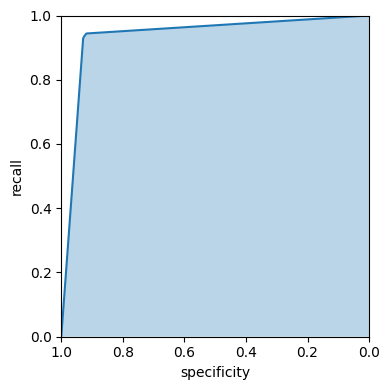

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y2_test, dtree2GS.predict_proba(x2_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y2_test, dtree2GS.predict_proba(x2_test)[:, 1]))

0.9355546000291817


On voit que sur notre test set on obtient un AUC beaucoup plus élevé que celui trouvé par le grid search. Cela est du au fait que notre modèle est très performant sur notre test set mais il n'est pas si bon en realité. Il faut donc plutot se baser sur l'AUC donné par le grid search qui est effectué sur plusieurs test sets issu du dataset entier

On trouve le meme modèle que lors du grid search precédent (sans oversampling et undersampling) et qui avait un AUC de 0.71.

Par rapport au modèle avec hyperparamètres par défaut (criterion='gini', min_samples_split=2, max_leaf_nodes=None) après avoir fait du oversampling et undersampling, on obtient un modèle avec un AUC moins bon sur notre test set en particulier.

Le meilleur modèle avec oversampling et undersampling (et le plus fiable) est celui trouvé par le grid search : DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes = None, min_samples_split = 4) ayant un AUC de 0.72


###Random Forest

Random Forest
On fait un grid search afin de trouver les meilleurs hyperparamètres. Comme precédement on regarde les hyperparamètres jugés les plus importants : n_estimators, criterion, max_leaf_nodes et min_samples_split et on laisse les autres par défaut.


In [ ]:
model = RandomForestClassifier()
cv = StratifiedKFold(n_splits=5)
space = dict()

space['n_estimators'] = [20, 50, 100]
space['criterion'] = ['gini', 'entropy', 'log_loss']
space['max_leaf_nodes'] = [None]
space['min_samples_split'] = [2, 3, 4]

search = GridSearchCV(model, space, scoring='roc_auc', n_jobs=-1, cv=cv) #On veut que le grid search prenne comme critere l'AUC
result = search.fit(x2_smt, y2_smt)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8217218708489312
Best Hyperparameters: {'criterion': 'gini', 'max_leaf_nodes': None, 'min_samples_split': 2, 'n_estimators': 100}


On trouve que les meilleurs hyperparamètres sont criterion = gini, max_leaf_nodes = None, min_samples_split = 2, n_estimators = 100, avec un score AUC de 0.82, ce qui correspond au modèle avec les hyperparamètres par defaut

Le modèle trouvé par le grid search avec oversampling et undersampling, est donc le même que les hyperparamètres par défaut.

Lors du grid search precédent (sans oversampling et undersampling), on avait trouvé un modèle avec des hyperparamètres très differents : criterion= 'log_loss', max_leaf_nodes= None, min_samples_split= 3, n_estimators= 20 avec un AUC de 0.94

On obtient donc que le meilleur modèle avec du oversampling puis undersampling est le modèle RandomForestClassifier avec les hyperparamètres par défaut et un AUC de 0.82. On trouve un AUC très bon avec notre test set en particulier, mais ce modèle n'est pas forcément si bon en realité.


**Conclusion**:

Avec du oversampling et undersampling, le meilleur modèle trouve par le grid search est la LogisticRegression(penalty='l2', C=10, solver='liblinear') ayant un AUC de 0.92.

Avant de faire le grid search, on avait trouvé que le meilleur modèle était un RandomForestClassifier car celui-ci est tres performant sur notre test set.

Sans oversampling et undersampling, le grid search precédent nous avait aussi donné comme meilleur modèle un RandomForestClassifier avec un AUC de 0.94


Pour conclure, on voit que le resampling permet d'améliorer nos modèles. On trouve comme meilleur modèle un LogisticRegression(penalty='l2', C=10, solver='liblinear'), alors que sans resampling on avait un different type de modèle un RandomForestClassifier.

##Dataset Employee Attrition

In [ ]:
df3 = pd.read_csv('whole data.csv')
df3

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,2,2,4,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,3,3,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,4,2,3,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,5,3,3,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,3,3,4.0,1.0,3.0,42,No,Travel_Rarely,Research & Development,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,4407,2,3,4.0,4.0,3.0,29,No,Travel_Rarely,Research & Development,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,4408,3,4,1.0,3.0,3.0,25,No,Travel_Rarely,Research & Development,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,4409,2,3,4.0,1.0,3.0,42,No,Travel_Rarely,Sales,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [ ]:
df3 = df3.dropna()
df3.isnull().sum()

EmployeeID                 0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [ ]:
df3 = df3.drop(columns=["EmployeeCount", "Over18", "StandardHours"])
df3

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,...,Married,131160,1.0,11,0,1.0,6,1,0,0
1,2,2,4,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,...,Single,41890,0.0,23,1,6.0,3,5,1,4
2,3,3,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,...,Married,193280,1.0,15,3,5.0,2,5,0,3
3,4,2,3,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,...,Married,83210,3.0,11,3,13.0,5,8,7,5
4,5,3,3,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,...,Single,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,4405,2,3,3.0,4.0,3.0,29,No,Travel_Rarely,Sales,...,Single,35390,1.0,18,0,6.0,2,6,1,5
4405,4406,3,3,4.0,1.0,3.0,42,No,Travel_Rarely,Research & Development,...,Single,60290,3.0,17,1,10.0,5,3,0,2
4406,4407,2,3,4.0,4.0,3.0,29,No,Travel_Rarely,Research & Development,...,Divorced,26790,2.0,15,0,10.0,2,3,0,2
4407,4408,3,4,1.0,3.0,3.0,25,No,Travel_Rarely,Research & Development,...,Married,37020,0.0,20,0,5.0,4,4,1,2


In [ ]:
df3['Attrition'] = df3['Attrition'].replace(['No', 'Yes'], [0, 1])
df3

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,3.0,4.0,2.0,51,0,Travel_Rarely,Sales,...,Married,131160,1.0,11,0,1.0,6,1,0,0
1,2,2,4,3.0,2.0,4.0,31,1,Travel_Frequently,Research & Development,...,Single,41890,0.0,23,1,6.0,3,5,1,4
2,3,3,3,2.0,2.0,1.0,32,0,Travel_Frequently,Research & Development,...,Married,193280,1.0,15,3,5.0,2,5,0,3
3,4,2,3,4.0,4.0,3.0,38,0,Non-Travel,Research & Development,...,Married,83210,3.0,11,3,13.0,5,8,7,5
4,5,3,3,4.0,1.0,3.0,32,0,Travel_Rarely,Research & Development,...,Single,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,4405,2,3,3.0,4.0,3.0,29,0,Travel_Rarely,Sales,...,Single,35390,1.0,18,0,6.0,2,6,1,5
4405,4406,3,3,4.0,1.0,3.0,42,0,Travel_Rarely,Research & Development,...,Single,60290,3.0,17,1,10.0,5,3,0,2
4406,4407,2,3,4.0,4.0,3.0,29,0,Travel_Rarely,Research & Development,...,Divorced,26790,2.0,15,0,10.0,2,3,0,2
4407,4408,3,4,1.0,3.0,3.0,25,0,Travel_Rarely,Research & Development,...,Married,37020,0.0,20,0,5.0,4,4,1,2


On transforme les variables categorielles en entiers pour pouvoir effectuer nos modeles

In [ ]:
labelEncoder2 = LabelEncoder()

df3['BusinessTravel'] = labelEncoder2.fit_transform(df3['BusinessTravel']) 
df3['Department'] = labelEncoder2.fit_transform(df3['Department'])
df3['EducationField'] = labelEncoder2.fit_transform(df3['EducationField'])
df3['Gender'] = labelEncoder2.fit_transform(df3['Gender'])
df3['JobRole'] = labelEncoder2.fit_transform(df3['JobRole'])
df3['MaritalStatus'] = labelEncoder2.fit_transform(df3['MaritalStatus'])


df3

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,3.0,4.0,2.0,51,0,2,2,...,1,131160,1.0,11,0,1.0,6,1,0,0
1,2,2,4,3.0,2.0,4.0,31,1,1,1,...,2,41890,0.0,23,1,6.0,3,5,1,4
2,3,3,3,2.0,2.0,1.0,32,0,1,1,...,1,193280,1.0,15,3,5.0,2,5,0,3
3,4,2,3,4.0,4.0,3.0,38,0,0,1,...,1,83210,3.0,11,3,13.0,5,8,7,5
4,5,3,3,4.0,1.0,3.0,32,0,2,1,...,2,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,4405,2,3,3.0,4.0,3.0,29,0,2,2,...,2,35390,1.0,18,0,6.0,2,6,1,5
4405,4406,3,3,4.0,1.0,3.0,42,0,2,1,...,2,60290,3.0,17,1,10.0,5,3,0,2
4406,4407,2,3,4.0,4.0,3.0,29,0,2,1,...,0,26790,2.0,15,0,10.0,2,3,0,2
4407,4408,3,4,1.0,3.0,3.0,25,0,2,1,...,1,37020,0.0,20,0,5.0,4,4,1,2


In [ ]:
x3 = df3.drop(['Attrition'], axis=1)
y3 =df3.Attrition

###Oversampling puis Undersampling avec hyperparamètres par défaut

On utilise la technique SMOTE et Tomek links, pour effectuer un oversampling suivi d'un undersampling

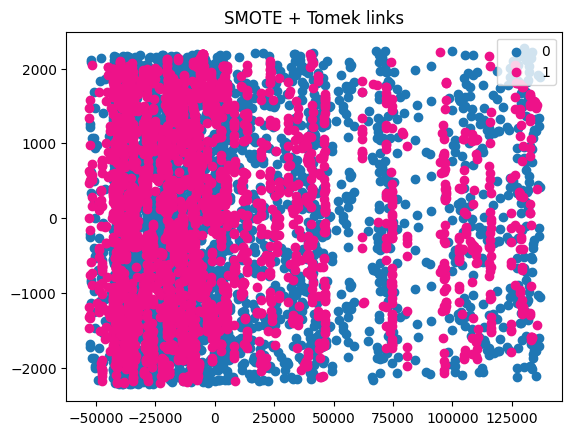

In [ ]:
smt = SMOTETomek(sampling_strategy='auto')
x3_smt, y3_smt = smt.fit_resample(x3, y3)

def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#EE1289']
    markers = ['o', 'o']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()



pca = PCA(n_components=2)
x3_smt2 = pca.fit_transform(x3_smt)

plot_2d_space(x3_smt2, y3_smt, 'SMOTE + Tomek links')

On divise le dataset en train et test sets.

In [ ]:
x3_train,x3_test,y3_train,y3_test = train_test_split(x3_smt,y3_smt,test_size=.2, random_state = 1989)

In [ ]:
Scaler_X3 = StandardScaler()
x3_train = Scaler_X3.fit_transform(x3_train)
x3_test = Scaler_X3.transform(x3_test)

###Regression Logisitque

On fait un modèle de Regression Logisitque avec les hyperparamètres par defaut

In [ ]:
lr3 = LogisticRegression()
lr3.fit(x3_train, y3_train)

LogisticRegression()

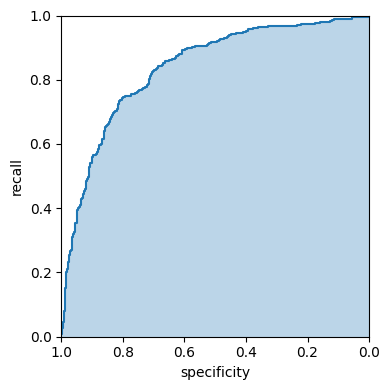

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y3_test, lr3.predict_proba(x3_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y3_test, lr3.predict_proba(x3_test)[:, 1]))

0.8364537766112571


On obtient un bon modèle avec un AUC de 0.83 ce qui est meilleur que
le modèle sans oversampling et undersampling (qui avait un AUC de 0.73).


###Decision Tree

On fait un modèle Decision Tree avec les hyperparamètres par defaut

In [ ]:
dtree3 = DecisionTreeClassifier()
dtree3.fit(x3_train, y3_train)

DecisionTreeClassifier()

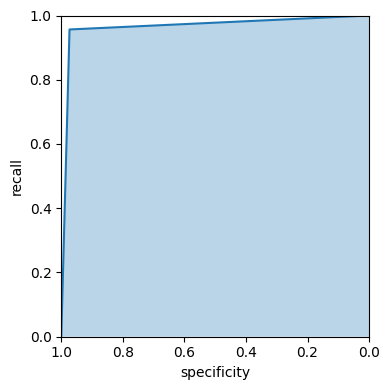

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y3_test, dtree3.predict_proba(x3_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y3_test, dtree3.predict_proba(x3_test)[:, 1]))

0.9648750427935638


On obtient un très bon modèle avec un AUC de 0.96
ce qui est très similaire au modèle sans oversampling et undersampling (qui avait un AUC de 0.97).


###SVM (sans kernel)

On fait un SVM (sans kernel) avec les hyperparamètres par defaut

In [ ]:
svmLinear3 = SVC(kernel = 'linear', probability = True)
svmLinear3.fit(x3_train, y3_train)

SVC(kernel='linear', probability=True)

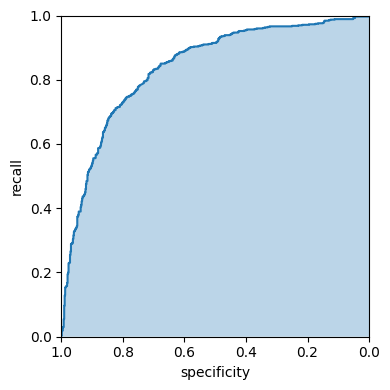

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y3_test, svmLinear3.predict_proba(x3_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y3_test, svmLinear3.predict_proba(x3_test)[:, 1]))

0.8360378865685267


On obtient un bon modèle avec un AUC de 0.83 ce qui est meilleur au modèle sans oversampling et undersampling(qui avait un AUC de 0.65)

###SVM (avec kernel)


On fait un SVM (avec kernel rbf) avec les hyperparamètres par defaut

In [ ]:
svm3 = SVC(probability = True)
svm3.fit(x3_train, y3_train)

SVC(probability=True)

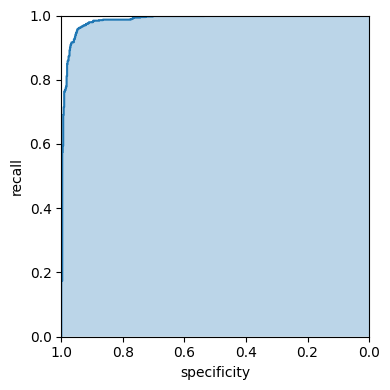

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y3_test, svm3.predict_proba(x3_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y3_test, svm3.predict_proba(x3_test)[:, 1]))

0.9861627803770905


On obtient un très bon modèle avec un AUC de 0.98 ce qui est meilleur que le modèle sans oversampling et undersampling (qui avait un AUC de 0.89)


###Random Forest

On fait un modèle Random Forest avec les hyperparamètres par defaut

In [ ]:
rf3 = RandomForestClassifier()
rf3.fit(x3_train, y3_train)

RandomForestClassifier()

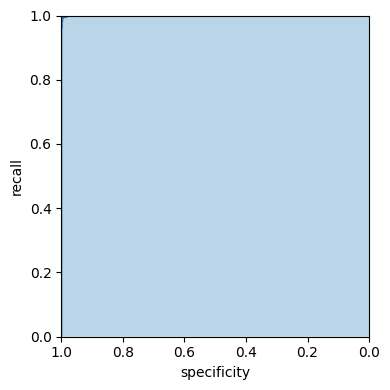

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y3_test, rf3.predict_proba(x3_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y3_test, rf3.predict_proba(x3_test)[:, 1]))

0.9998250218722661


On obtient un très bon modèle avec un AUC de 0.99, ce qui est très similaire au modèle sans oversampling et undersampling (qui avait aussi un AUC très proche de 1).


RECAP : On voit que pour tous les modèles, l'oversampling et undersampling améliore l'AUC.

Pour l'instant après le oversampling et undersampling, le meilleur modèle est un Random Forest  (AUC très proche de 1). Sans oversampling/undersampling on obtient aussi que le meilleur modèle est un Random Forest Classifier.


###Oversampling puis Undersampling avec Grid Search

###Regression Logistique

On fait un grid search afin de trouver les meilleurs hyperparamètres. Comme precédement on s'interesse au type de solver, penalty et la valeur du paramètre C. On fait par ailleurs, un RepeatedStartifiedKFold car le jeux de données n'est pas tres grand. 

In [ ]:
model = LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['solver'] = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

search = GridSearchCV(model, space, scoring='roc_auc', n_jobs=-1, cv=cv) #On veut que le grid search prenne comme critere l'AUC
result = search.fit(x3_smt, y3_smt)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.846700460699193
Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cholesky'}


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
2640 fits failed out of a total of 5760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 71, in _check_solver
    raise ValueError("penalty='none' i

On trouve que les meilleurs hyperparamètres sont C = 100, penalty = l2 et solver = newton-cholesky, avec un AUC de 0.84.

On refait donc un modèle de régression logistique avec ces hyperparamètres 

In [ ]:
lr3GS = LogisticRegression(penalty='l2', C=100, solver='newton-cholesky')
lr3GS.fit(x3_train, y3_train)

LogisticRegression(C=100, solver='newton-cholesky')

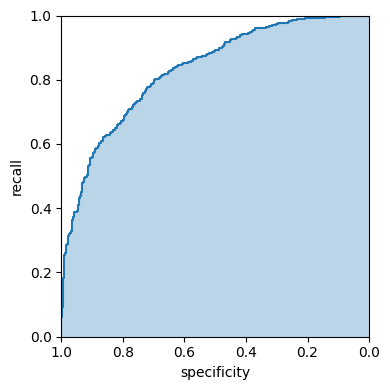

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y3_test, lr3GS.predict_proba(x3_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y3_test, lr3GS.predict_proba(x3_test)[:, 1]))

0.8297832974860657


En comparaison au modèle du grid search precédent (sans oversampling et undersampling), on avait trouvé des hyperparamètres très differents : C=1, penalty='l1', solver='liblinear' et le modèle était moins bon ayant un AUC de 0.75.

Par rapport au modèle avec hyperparamètres par défaut (C=1, penalty='l2', solver='lbfgs') après avoir fait  du oversampling et undersampling, on obtient un modèle avec un AUC simlaire.

Donc le meilleur modèle avec oversampling et undersampling est bien celui trouvé par le grid search : LogisticRegression(penalty='l2', C=100, solver='newton-cholesky') ayant un AUC de 0.84

###Decision Tree

On fait un grid search afin de trouver les meilleurs hyperparamètres. Comme precédement on regarde les hyperparamètres jugés les plus importants : criterion, max_leaf_nodes et min_samples_split et on laisse les autres par défaut. On fait par ailleurs, un RepeatedStartifiedKFold car le jeux de données n'est pas très grand.

In [ ]:
model = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['criterion'] = ['gini', 'entropy', 'log_loss']
space['max_leaf_nodes'] = [None]
space['min_samples_split'] = [2, 3, 4]

search = GridSearchCV(model, space, scoring='roc_auc', n_jobs=-1, cv=cv) #On veut que le grid search prenne comme critere l'AUC
result = search.fit(x3_smt, y3_smt)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.982955451122654
Best Hyperparameters: {'criterion': 'entropy', 'max_leaf_nodes': None, 'min_samples_split': 2}


On trouve que les meilleurs hyperparamètres sont criterion = entropy, max_leaf_nodes = None, min_samples_split = 2 , avec un score AUC de 0.98

On refait donc un modèle decision tree avec ces hyperparamètres

In [ ]:
dtree3GS = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes = None, min_samples_split = 2)
dtree3GS.fit(x3_train, y3_train)

DecisionTreeClassifier(criterion='entropy')

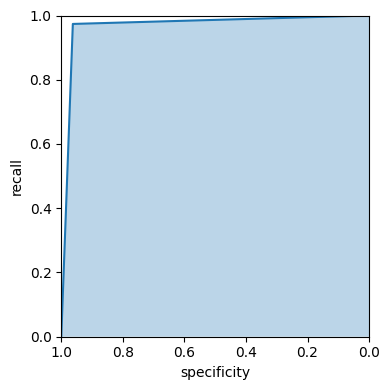

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y3_test, dtree3GS.predict_proba(x3_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y3_test, dtree3GS.predict_proba(x3_test)[:, 1]))

0.9680843682786374


En comparaison au modèle du grid search precédent (sans oversampling et undersampling), on avait trouvé un hyperparamètre different : criterion = log_loss mais le modèle avait également un AUC de 0.98

Par rapport au modèle avec hyperparamètres par défaut (criterion='gini', min_samples_split=2, max_leaf_nodes=None) après avoir fait du oversampling et undersampling, on obtient un modèle avec un AUC très simlaire.

Le meilleur modèle avec oversampling et undersampling est celui trouvé par le grid search : DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes = None, min_samples_split = 2) ayant un AUC de 0.98

###Random Forest

On fait un grid search afin de trouver les meilleurs hyperparamètres. Comme precédement on regarde les hyperparamètres jugés les plus importants : n_estimators, criterion, max_leaf_nodes et min_samples_split et on laisse les autres par défaut.

In [ ]:
model = RandomForestClassifier()
cv = StratifiedKFold(n_splits=5)
space = dict()
space['n_estimators'] = [20, 50, 100]
space['criterion'] = ['gini', 'entropy', 'log_loss']
space['max_leaf_nodes'] = [None]
space['min_samples_split'] = [2, 3, 4]

search = GridSearchCV(model, space, scoring='roc_auc', n_jobs=-1, cv=cv) #On veut que le grid search prenne comme critere l'AUC
result = search.fit(x3_smt, y3_smt)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9011720028717948
Best Hyperparameters: {'criterion': 'gini', 'max_leaf_nodes': None, 'min_samples_split': 2, 'n_estimators': 20}


On trouve que les meilleurs hyperparamètres sont criterion = gini, max_leaf_nodes = None, min_samples_split = 2, n_estimators = 20, avec un score AUC de 0.9

On refait donc un modèle avec ces hyperparamètres 

In [ ]:
rf3GS = RandomForestClassifier(criterion = 'gini', max_leaf_nodes = None, min_samples_split = 2, n_estimators = 20)
rf3GS.fit(x3_train, y3_train)

RandomForestClassifier(n_estimators=20)

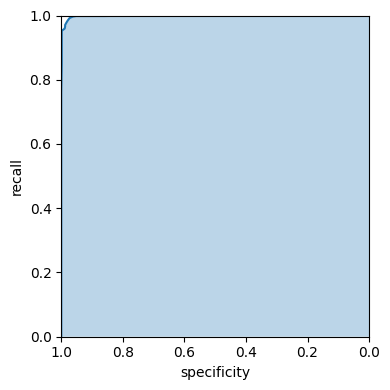

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y3_test, rf3GS.predict_proba(x3_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y3_test, rf3GS.predict_proba(x3_test)[:, 1]))

0.9986182822136169


Le modèle trouvé par le grid search avec oversampling et undersampling, est très proche du model avec les hyperparamètres par défaut, selement le nombre d'estimateurs change (on a 20 au lieu de 100).

De même lors du grid search precédent (sans oversampling et undersampling), on avait trouvé un modèle avec les hyperparamètres par défaut (criterion='gini', min_samples_split=2, max_leaf_nodes=None) et n_estimators = 50, mais on avait un AUC proche de 1.

Avec de l'oversampling et undersampling, sur notre test set en particulier, ce modèle est très performant, mais on doit se baser sur l'AUC trouvé lors du grid search (AUC de 0.9) qui est fait sur tout le dataset.

On obtient donc que le meilleur modèle avec du oversampling puis undersampling est RandomForestClassifier(criterion = 'gini', max_leaf_nodes = None, min_samples_split = 2, n_estimators = 20) avec un AUC de 0.9

**Conclusion**:

Avec du oversampling et undersampling, le meilleur modèle trouvé par le grid search est le DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes = None, min_samples_split = 2) ayant un AUC de 0.98.

Avant de faire le grid search, on avait trouvé que le meilleur modèle, sur notre test set en particulier, était un RandomForestClassifier.

Sans oversampling et undersampling, le grid search precédent nous avait aussi donné comme meilleur modèle un RandomForestClassifier avec un AUC très proche de 1.




Pour conclure, on voit que le resampling permet d'améliorer nos modèles. On trouve comme meilleur modèle un DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes = None, min_samples_split = 2), alors que sans resampling on avait un different type de modèle un RandomForestClassifier.